# Regresion Lineal

In [3]:
# Dependencias 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

$$ y = mx + b$$

In [8]:
data = pd.read_csv('../data/articulos_ml.csv')
data.shape

(161, 8)

In [9]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [10]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


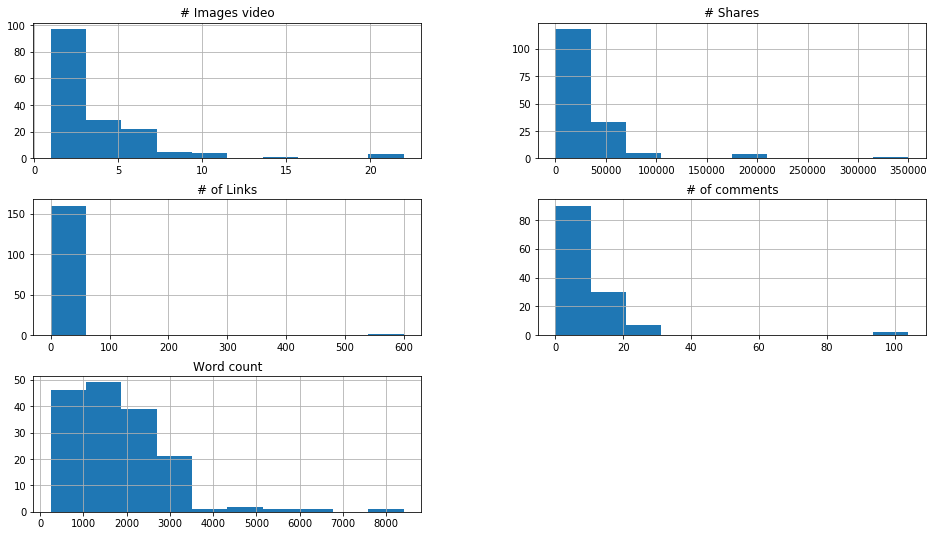

In [12]:
data.drop(['Title','url','Elapsed days'],1).hist()
plt.show()

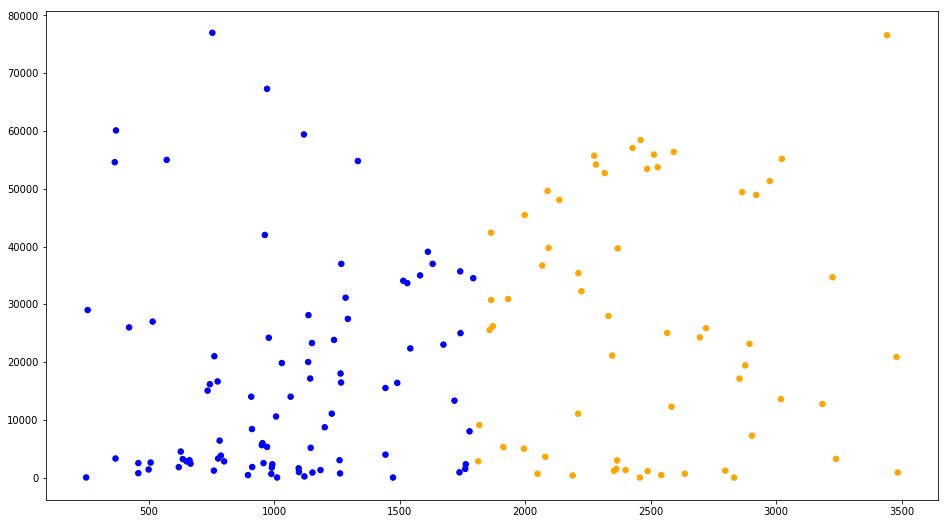

In [26]:
# Vamos a RECORTAR los datos en la zona donde se contran más puntos
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
colores = ['orange','blue']
tamanios = [30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Pintar puntos por debajo y por encima de la media de Cantidad de Palabras
asignar = []
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1,f2,c=asignar,s=tamanios[0])
plt.show()


In [30]:
dataX = filtered_data[['Word count']]
x_train = np.array(dataX)
y_train = filtred_data['# Shares'].values

# Objeto de la regresion lineal
regr = linear_model.LinearRegression()

# Entrenar modelo
regr.fit(x_train, y_train)

# Hacer las predicciones que en definitiva por un linea
y_pred = regr.predict(x_train)

# Tangente
print('Coefficients:', regr.coef_)

# Donde corta el eje Y
print('Indepedent term:', regr.intercept_)

# Error cuadrado medio
print('Mean squared error: %.2f' % mean_squared_error(y_train,y_pred))

#Varianza: El mejor puntaje posible es 1
print('Variance score: %.2f' % r2_score(y_train,y_pred))



Coefficients: [5.69765366]
Indepedent term: 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


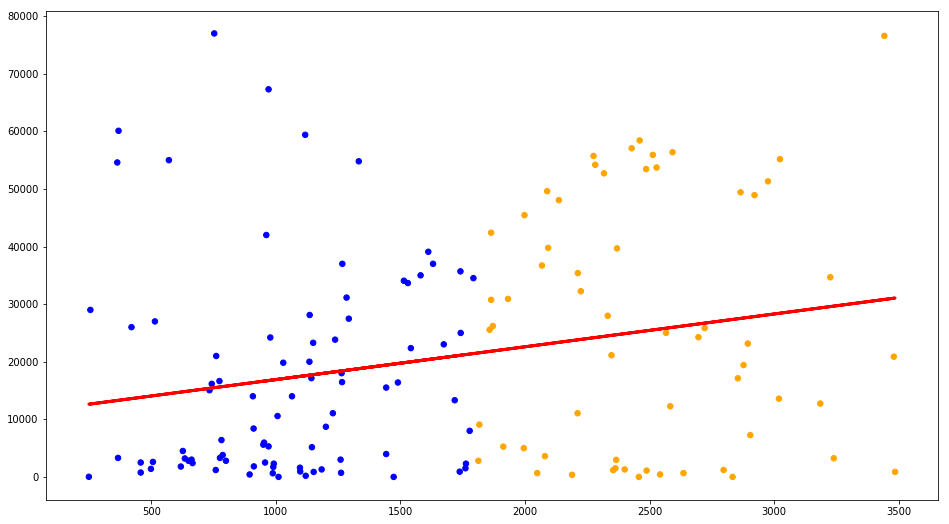

In [32]:
plt.plot(x_train, y_pred, color='red', linewidth=3)
plt.scatter(f1,f2,c=asignar,s=tamanios[0])
plt.show()

## Regresión Lineal Múltiples Variables

$$ y = b + m_1x_1 + m_2x_2 + \dots + m_{(n)}x_{(n)}$$

In [34]:
# Vamos a mejorar el modelo con un dimencion mas
# Para poder graficar 3D
suma = (filtered_data['# of Links'] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

datax2 = pd.DataFrame()
datax2['Word count'] = filtered_data['Word count']
datax2['suma'] = suma
xy_train = np.array(datax2)
z_train = filtered_data['# Shares'].values

Nota: Hubiera sido mejor aplicar PCA para reducción de dimenciones, manteniendo la información más importante de todas

In [35]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo esta vez con 2 dimenciones
regr2.fit(xy_train, z_train)

# Hacemos la prediccion
z_pred = regr2.predict(xy_train)

# Donde corta el eje Y
print('Indepedent term:', regr2.intercept_)

# Error cuadrado medio
print('Mean squared error: %.2f' % mean_squared_error(z_train,z_pred))

#Varianza: El mejor puntaje posible es 1
print('Variance score: %.2f' % r2_score(z_train,z_pred))

Indepedent term: 16921.89109834336
Mean squared error: 352122816.48
Variance score: 0.11


In [ ]:
fig = plt.figure()
ax = Axes3D()

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0,3500, num=10),np.linspace(0,60,num=10))

# Calculamos los valores del plano para x e y
nuevox = (regr2.coef_[0]*xx)
nuevoy = (regr2.coef[1]*yy)

# Calculamos los correspondientes valores para z. Debemos sumar el punto de interseccion


